In [18]:
# Importing Necessary Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Size of plot width=20, height=10
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [19]:
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [20]:
# Collecting X and Y
# using Head Size to Predict Brain Weight
x = data['Head Size(cm^3)']/100
y = data['Brain Weight(grams)']/100

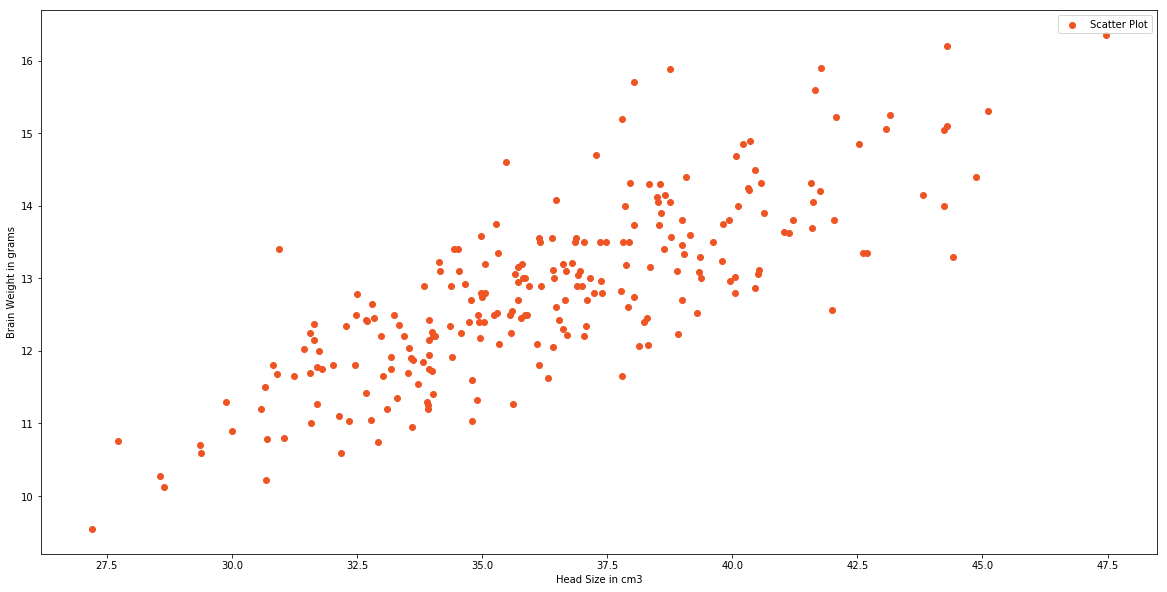

In [21]:
# Plotting Dataset
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [23]:
# Finding Parameters
# Mean y and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Total number of values
m = len(x)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.2634293394893993 3.255734210494426


In [24]:
y_pred = []
for i in range(m):
    y_pred.append(b0 + b1*x[i])

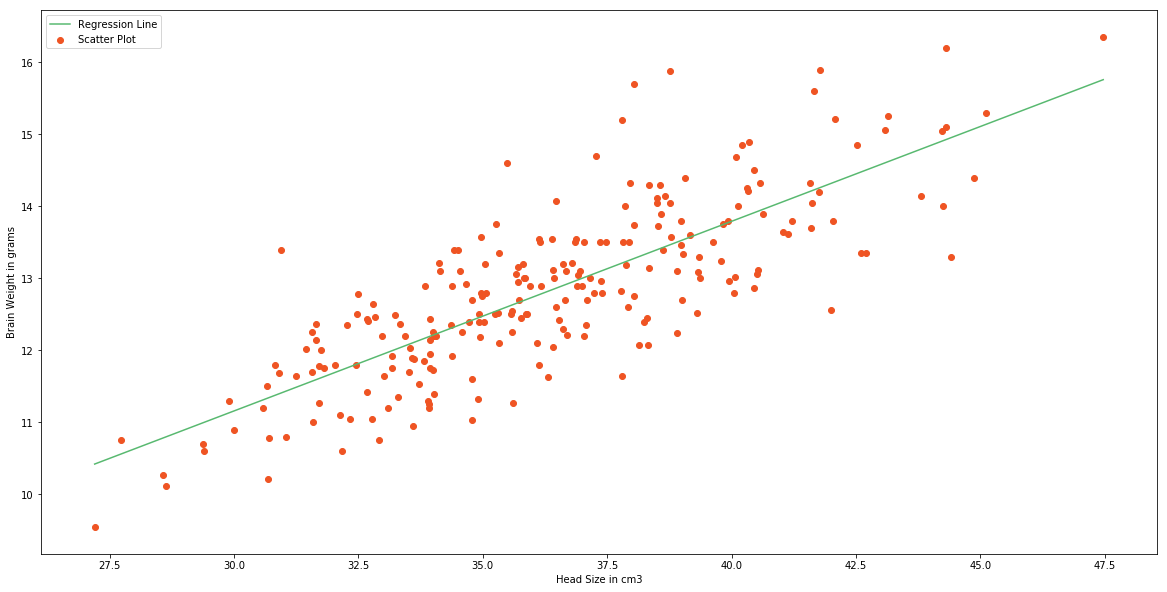

In [25]:
#to plot linear regression line
max_x = np.max(x) 
min_x = np.min(x) 

max_yp = np.max(y_pred) 
min_yp = np.min(y_pred) 

# Calculating line values x and y
x_plt = np.linspace(min_x,max_x)
yp = np.linspace(min_yp, max_yp)

# Ploting the scores as scatter plot
plt.plot(x_plt, yp, color='#58b970', label='Regression Line')
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [26]:
# Model Evaluation - RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y) ** 2)
    ss_res = sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [27]:
print("Mean Square Error : ",rmse(y, y_pred))
print("Accuracy : ",r2_score(y, y_pred))

Mean Square Error :  0.7212062137837091
Accuracy :  0.6393117199570004
